# Exemple d'évenement de microlensing

auteur : Sylvie Dagoret-Campagne

date de creation : 26 mars 2021

affiliation : IJCLab/IN2P3/CNRS



In [1]:
from astropy import constants as const
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.labelsize"] = 'xx-large'
plt.rcParams['axes.titlesize'] = 'xx-large'
plt.rcParams['xtick.labelsize']= 'xx-large'
plt.rcParams['ytick.labelsize']= 'xx-large'

In [2]:
from scipy.stats import stats

In [3]:
df =pd.read_csv("cadence_lmc_baseline2018a.csv",index_col=0)

In [4]:
df

,observationId,night,observationStartMJD,fiveSigmaDepth,filter,airmass,skyBrightness,seeingFwhmEff,fieldId,fieldRA,fieldDec
0,8476,11,59863.363137,22.906131,z,1.231287,18.659079,0.757448,236,79.825808,-65.928086
1,10032,13,59865.306991,21.987304,y,1.386800,17.826026,0.751198,116,77.606893,-73.293777
2,10160,13,59865.365718,21.894638,y,1.315613,17.861954,0.841153,150,81.777206,-70.757749
3,10161,13,59865.366169,21.944466,y,1.267955,17.897698,0.822736,190,84.972540,-68.155026
4,10165,13,59865.367986,21.959869,y,1.232333,17.922088,0.824816,236,79.825808,-65.928086
...,...,...,...,...,...,...,...,...,...,...,...
753,2372036,3648,63500.371725,23.393553,r,1.375268,20.153390,1.243669,116,77.606893,-73.293777
754,2372039,3648,63500.373102,23.480260,r,1.278194,20.210373,1.190228,178,76.364237,-68.470535
755,2372040,3648,63500.373553,23.375525,r,1.328889,20.176793,1.284311,150,81.777206,-70.757749
756,2372049,3648,63500.377604,23.414925,r,1.285710,20.198968,1.256791,190,84.972540,-68.155026


In [5]:
t0 = (df["observationStartMJD"][0] + df["observationStartMJD"][len(df)-1])/2

In [6]:
t0

61681.871973379624

In [7]:
u0=0.5

In [8]:
tE=100

In [9]:
def u(t):
    u= np.sqrt(u0**2+ ((t-t0)/tE)**2)
    return u

In [10]:
def A(u):
    a = (u**2+2)/u/np.sqrt(u**2+4)
    return a

In [11]:
tmin=t0-5.*tE
tmax=t0+5.*tE

In [12]:
ti=np.linspace(tmin,tmax,100)

In [13]:
df_event=df[(df["observationStartMJD"] >= tmin) & (df["observationStartMJD"] <= tmax)] 

In [14]:
df_event_times=df_event["observationStartMJD"].values

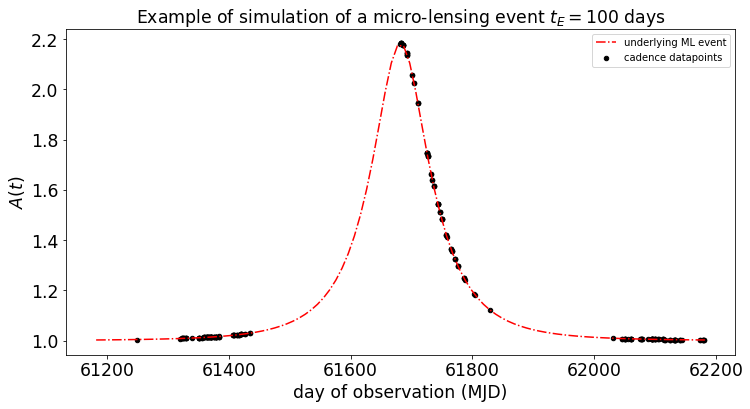

In [15]:
plt.plot(ti,A(u(ti)),"-.",color="r",label="underlying ML event")
plt.scatter(df_event_times,A(u(df_event_times)),marker="o",s=20,color="k",label="cadence datapoints")
plt.xlabel("day of observation (MJD)")
plt.ylabel("$A(t)$")
plt.title("Example of simulation of a micro-lensing event $t_E = 100$ days")
plt.legend()